GISTEMP Team, 2019: GISS Surface Temperature Analysis (GISTEMP), version 4. NASA Goddard Institute for Space Studies. Dataset accessed 20YY-MM-DD at https://data.giss.nasa.gov/gistemp/.

Lenssen, N., G. Schmidt, J. Hansen, M. Menne,A. Persin,R. Ruedy, and D. Zyss, 2019: Improvements in the GISTEMP uncertainty model. J. Geophys. Res. Atmos., 124, no. 12, 6307-6326, doi:10.1029/2018JD029522.

https://data.giss.nasa.gov/gistemp/

another use case = loading data!

In [26]:
# from climate import NasaTemperature
,
class NasaTemperature:
    def info(self):
        pass

In [27]:
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('ggplot')

In [28]:
home = Path.home() / 'climate-data'

In [29]:
carbon = pd.read_csv(home / 'carbon' / 'clean' / 'co2_mm_mlo.csv', index_col=0, parse_dates=True)
carbon_info = pd.read_fwf(home / 'carbon' / 'clean' / 'co2_mm_mlo.txt')

carbon.head()

,year,month,decimal date,average,interpolated,trend,ndays
1958-03-01,1958,3,1958.208,315.71,315.71,314.62,-1
1958-04-01,1958,4,1958.292,317.45,317.45,315.29,-1
1958-05-01,1958,5,1958.375,317.50,317.50,314.71,-1
1958-06-01,1958,6,1958.458,-99.99,317.10,314.85,-1
1958-07-01,1958,7,1958.542,315.86,315.86,314.98,-1


In [35]:
carbon.fillna(method='backfill', inplace=True)

In [31]:
carbon_info.values

array([['USE OF NOAA ESRL DATA'],
       ['These data are made freely available to the public and the'],
       ['scientific community in the belief that their wide dissemination'],
       ['will lead to greater understanding and new scientific insights.'],
       ['The availability of these data does not constitute publication'],
       ['of the data.  NOAA relies on the ethics and integrity of the user to'],
       ['ensure that ESRL receives fair credit for their work.  If the data'],
       ['are obtained for potential use in a publication or presentation,'],
       ['ESRL should be informed at the outset of the nature of this work.'],
       ['If the ESRL data are essential to the work, or if an important'],
       ['result or conclusion depends on the ESRL data, co-authorship'],
       ['may be appropriate.  This should be discussed at an early stage in'],
       ['the work.  Manuscripts using the ESRL data should be sent to ESRL'],
       ['for review before they are submitted f

In [5]:
temp = pd.read_csv(home / 'temperature' / 'clean' / 'global.csv', index_col=0, parse_dates=True)

temp.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON,Year.1
Year,,,,,,,,,,,,,,,,,,,
1880-01-01,-0.17,-0.23,-0.08,-0.15,-0.09,-0.20,-0.17,-0.09,-0.14,-0.22,-0.21,-0.17,-0.16,0.00,0.00,-0.11,-0.15,-0.19,1880
1881-01-01,-0.18,-0.13,0.04,0.06,0.07,-0.18,0.01,-0.02,-0.14,-0.20,-0.17,-0.06,-0.07,-0.08,-0.16,0.06,-0.06,-0.17,1881
1882-01-01,0.18,0.15,0.06,-0.15,-0.13,-0.21,-0.15,-0.06,-0.13,-0.23,-0.15,-0.35,-0.10,-0.07,0.09,-0.08,-0.14,-0.17,1882
1883-01-01,-0.28,-0.35,-0.11,-0.18,-0.17,-0.06,-0.07,-0.13,-0.21,-0.10,-0.23,-0.10,-0.17,-0.19,-0.33,-0.15,-0.08,-0.18,1883
1884-01-01,-0.12,-0.08,-0.36,-0.39,-0.34,-0.34,-0.32,-0.27,-0.27,-0.24,-0.32,-0.30,-0.28,-0.26,-0.10,-0.36,-0.31,-0.28,1884


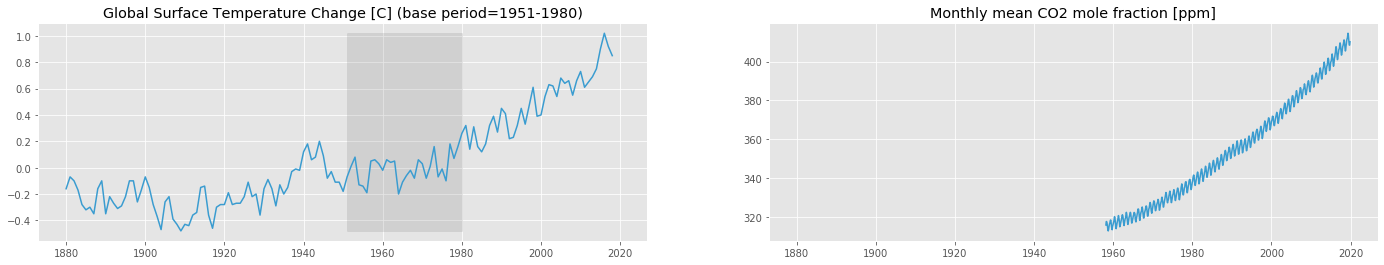

In [54]:
fig, ax = plt.subplots(ncols=2, sharex=True, figsize=(24, 4))

ax[0].plot(temp.index, temp.loc[:, 'J-D'], color='#3a9cd0')
ax[1].plot(carbon.index, carbon.loc[:, 'interpolated'], color='#3a9cd0')

ax[0].fill_between(
    x=('1951-01-01', '1980-01-01'), 
    y1=min(temp.loc[:, 'J-D']), 
    y2=max(temp.loc[:, 'J-D']),
    color='gray', 
    alpha=0.2
)

ax[0].set_title('Global Surface Temperature Change [C] (base period=1951-1980)')
ax[1].set_title('Monthly mean CO2 mole fraction [ppm]')

(home / 'figures' ).mkdir(exist_ok=True)
fig.savefig(home / 'figures' / 'f1.png')